In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import json files
city_data = os.path.join(".", "city_data.csv")
ride_data = os.path.join(".", "ride_data.csv")

#Read the imported csv
city_pd = pd.read_csv(city_data)
city_pd.head()

#Read the imported csv file
ride_pd = pd.read_csv(ride_data)
ride_pd.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [2]:
#Average Fare Per City
city_ride = ride_pd.groupby("city")
avg_fare = city_ride["fare"].mean()
avg_fare

city
Alvarezhaven            23.928710
Alyssaberg              20.609615
Anitamouth              37.315556
Antoniomouth            23.625000
Aprilchester            21.981579
Arnoldview              25.106452
Campbellport            33.711333
Carrollbury             36.606000
Carrollfort             25.395517
Clarkstad               31.051667
Conwaymouth             34.591818
Davidtown               22.978095
Davistown               21.497200
East Cherylfurt         31.416154
East Douglas            26.169091
East Erin               24.478214
East Jenniferchester    32.599474
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Edwardsbury             26.876667
Erikport                30.043750
Eriktown                25.478947
Floresberg              32.310000
Fosterside              23.034583
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Jacobfort               24.779355
Jasonfort

In [3]:
#Total Number of Rides Per City
ride_count = city_ride["ride_id"].count()
ride_count

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [4]:
# Total Number of Drivers per City
city_driver = city_pd.groupby("city")
driver_count = city_driver['driver_count'].sum()

In [5]:
# City Type
city_type = city_pd['type']
city_type_count = city_type.value_counts()
city_type_count

Urban       66
Suburban    42
Rural       18
Name: type, dtype: int64

In [84]:
#Bubble Plot


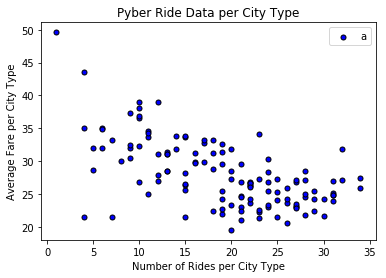

In [94]:
# Tell matplotlib to create a bubble plot based upon the above data
plt.scatter(ride_count,avg_fare,s=25, marker="o", facecolors="blue", edgecolors="black", data=city_type)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Data per City Type")
plt.xlabel("Number of Rides per City Type")
plt.ylabel("Average Fare per City Type")
plt.legend("a")

#print to screen
plt.show()

In [8]:
#Data for Pie Charts
#Percentage Total fares per City Type

#Merge Files Based on City Column
combined_df = pd.merge(city_pd, ride_pd,how='outer', right_on = 'city', left_on='city')
combined_df.head()

total_fares = combined_df['fare'].sum()
total_fares


city_type = combined_df.groupby("type")
total_city_fares = city_type['fare'].sum()
total_city_fares

#Percentages
fares_city = (total_city_fares / total_fares) * 100
fares_city



type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: fare, dtype: float64

In [61]:
#Pie Chart - Percentage of Total Fares by City Type
x= fares_city
x



type
Rural        6.579786
Suburban    31.445750
Urban       61.974463
Name: fare, dtype: float64

In [54]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ["yellow", "red", "lightskyblue"]
explode = (0, 0, .250)


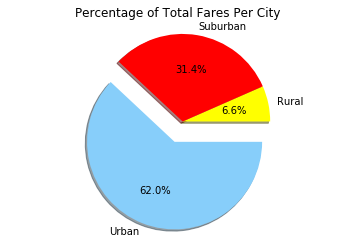

In [58]:
plt.title("Percentage of Total Fares Per City")
plt.pie(x, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.show()

In [62]:
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [63]:
#Data for Pie Charts
#Percentage Total Riders per City Type

total_trips = combined_df['ride_id'].count()
total_trips


riders = city_type['city'].count()
riders

riders_city = (riders / total_trips) * 100
riders_city

type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: city, dtype: float64

In [ ]:
#Pie Chart - Perentage Total Riders per City Type

In [64]:
x= riders_city
x


type
Rural        5.193187
Suburban    27.295388
Urban       67.511425
Name: city, dtype: float64

In [65]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ["yellow", "red", "lightskyblue"]
explode = (0, 0, .250)


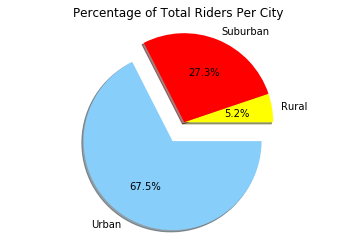

In [66]:
plt.title("Percentage of Total Riders Per City")
plt.pie(x, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.show()

In [68]:
#Data for Pie Charts
#Percentage Total drivers per City Type

total_drivers = combined_df['driver_count'].sum()
total_drivers


drivers = city_type['driver_count'].sum()
drivers

drivers_city = (drivers / total_drivers) * 100
drivers_city

type
Rural        0.969876
Suburban    12.980602
Urban       86.049521
Name: driver_count, dtype: float64

In [ ]:
#Pie Chart - Total Drivers By City Type

In [69]:
x= drivers_city
x


type
Rural        0.969876
Suburban    12.980602
Urban       86.049521
Name: driver_count, dtype: float64

In [70]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ["yellow", "red", "lightskyblue"]
explode = (0, 0, .250)


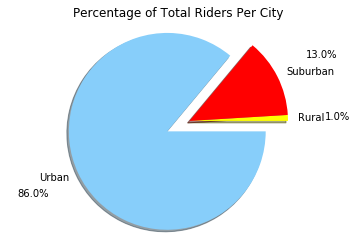

In [80]:
plt.title("Percentage of Total Riders Per City")
plt.pie(x, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True,pctdistance=1.5)
plt.axis("equal")
plt.show()